In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_dir = os.path.join('/home/mirjam/Documents/Meertens/Artikelen/train/')
validation_dir = os.path.join('/home/mirjam/Documents/Meertens/Artikelen/test/')



In [8]:
train_gothic_dir = os.path.join(train_dir, 'Gothic')  # directory with training gothic pictures
train_latin_dir = os.path.join(train_dir, 'Latin')  # directory with training latin pictures
validation_gothic_dir = os.path.join(validation_dir, 'Gothic')  # directory with test gothic pictures
validation_latin_dir = os.path.join(validation_dir, 'Latin')  # directory with test latin pictures


In [9]:
num_gothic_tr = len(os.listdir(train_gothic_dir))
num_latin_tr = len(os.listdir(train_latin_dir))

num_gothic_val = len(os.listdir(validation_gothic_dir))
num_latin_val = len(os.listdir(validation_latin_dir))

total_train = num_gothic_tr + num_latin_tr
total_val = num_gothic_val + num_latin_val

In [10]:
print('total training gothic images:', num_gothic_tr)
print('total training latin images:', num_latin_tr)

print('total validation gothic images:', num_gothic_val)
print('total validation latin images:', num_latin_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training gothic images: 27
total training latin images: 13
total validation gothic images: 9
total validation latin images: 5
--
Total training images: 40
Total validation images: 14


In [27]:
batch_size = 128 # the number of examples in a batch, please increase 
epochs = 15 # A full training pass over the entire dataset such that each example has been seen once. 
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [28]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [29]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 40 images belonging to 2 classes.


In [30]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 14 images belonging to 2 classes.


In [31]:
sample_training_images, _ = next(train_data_gen)


In [32]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


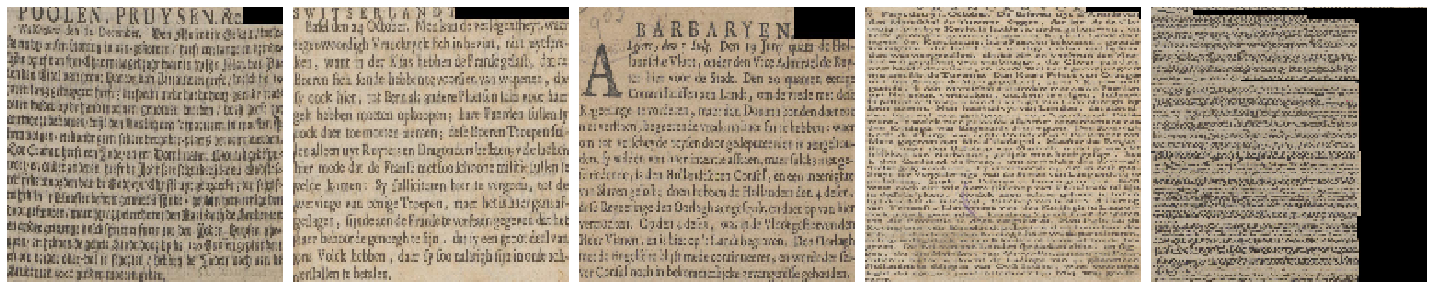

In [33]:
plotImages(sample_training_images[:5])


In [34]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])




In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [36]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [37]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 1 steps
Epoch 1/15
4/4 [==============================] - 1s 371ms/step - loss: 1.4821 - accuracy: 0.5250 - val_loss: 0.7307 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 1s 283ms/step - loss: 0.6308 - accuracy: 0.6750 - val_loss: 0.8180 - val_accuracy: 0.5000
Epoch 3/15
4/4 [==============================] - 1s 286ms/step - loss: 0.6417 - accuracy: 0.6750 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 1s 286ms/step - loss: 0.5823 - accuracy: 0.6750 - val_loss: 0.6590 - val_accuracy: 0.5000
Epoch 5/15
4/4 [==============================] - 1s 285ms/step - loss: 0.5179 - accuracy: 0.6750 - val_loss: 0.9490 - val_accuracy: 0.5000
Epoch 6/15
4/4 [==============================] - 1s 285ms/step - loss: 0.5238 - accuracy: 0.6750 - val_loss: 0.5885 - val_accuracy: 0.5000
Epoch 7/15
4/4 [==============================] - 1s 284ms/step - loss

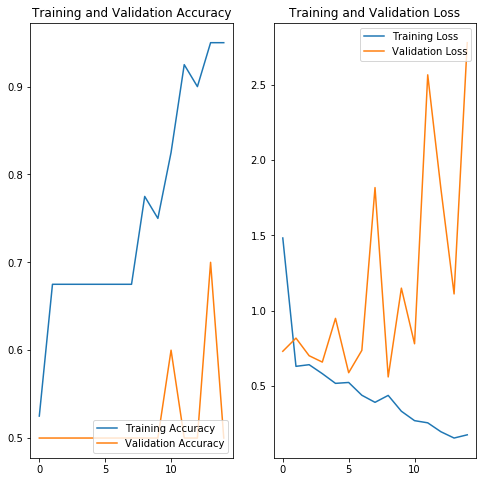

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
